# Final Project
###### Karina Ruban

## Task 2. Descriptive statistic:
##### 1. Calculate summary statistics (average, median, mode, range) for numeric fields.
##### 2. Analyse categorical columns such as quality, stage, source and product.

##### **README** important to filter

##### Added "flag"-values in data:

|df|col|(value)|
|------|------|------|
|Calls |Contact_ID    |0000000000000000000    |
|Calls |Call_Duration_Sec     |0     |
|Deals |Initial_Amount_Paid     |1000000    |
|Deals |Offer_Total_Amount     |1000000     |

In [1]:
#import libraries & loadibg datasets

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

with open('cleaned_project_data.pickle', 'rb') as f:
    calls, contacts, deals, spend = pickle.load(f)

In [2]:
# universal function for numeric cols to print summary statistics

def analyze_numeric_cols(dataset, column_name):
    clean_data = dataset[column_name].dropna()
    
    if clean_data.empty:
        print(f'{column_name} contains no numbers.')
        return
    
    avg_value = clean_data.mean()
    print(f'\nAverage: {avg_value}')
    
    median_value = clean_data.median()
    print(f'Median: {median_value}')

    mode_value = clean_data.mode().iloc[0] if not clean_data.mode().empty else 'N/A'
    print(f'Mode: {mode_value}')
    
    range_value = clean_data.max() - clean_data.min()
    print(f'Range (MAX - MIN): {range_value}')

    plt.figure(figsize=(10, 6))
    sns.histplot(data=clean_data, bins='auto')
    plt.title(f'Distribution histogram for column "{column_name}"', fontsize=16)
    plt.xlabel(column_name, fontsize=12)
    plt.tight_layout()
    plt.show()

## Descriptive statisctic of dataset Calls

##### Summary:

- ###### Total number of unique calls: 95874
- ###### Range (1 to 7624 seconds): avg - 214 s, mode - 5 s, median 21 s.

- ###### Over 90% calls -- outbounds

- ###### Total number of unique managers: 33
- ###### The call status ratio (completed, overdue, missed, scheduled) is completely different for managers

In [3]:
# check format for Calls

calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95874 entries, 0 to 95873
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Calls_ID              95874 non-null  object        
 1   Call_Start_Time       95874 non-null  datetime64[ns]
 2   Calls_Manager         95874 non-null  category      
 3   Contact_ID            95874 non-null  object        
 4   Call_Type             95874 non-null  category      
 5   Call_Duration_Sec     95874 non-null  int32         
 6   Call_Status           95874 non-null  category      
 7   Outgoing_Call_Status  86875 non-null  category      
 8   Scheduled_In_CRM      95874 non-null  bool          
dtypes: bool(1), category(4), datetime64[ns](1), int32(1), object(2)
memory usage: 3.0+ MB


### Calculate summary statistics (average, median, mode, range) for number fields in Calls

Summary statistics (average, median, mode, range) for number fields in Calls

Total number of unique calls: 95874

Summary about call duration (sec):
                     Call_Start_Time  Call_Duration_Sec
count                          73816       73816.000000
mean   2024-02-04 23:28:25.599328256         214.090942
min              2023-06-30 08:43:00           1.000000
25%              2023-11-28 11:16:15           6.000000
50%              2024-02-15 14:17:30          21.000000
75%              2024-04-19 17:27:00         194.000000
max              2024-06-21 15:30:00        7625.000000
std                              NaN         445.628667

Average: 214.09094234312343
Median: 21.0
Mode: 5
Range (MAX - MIN): 7624


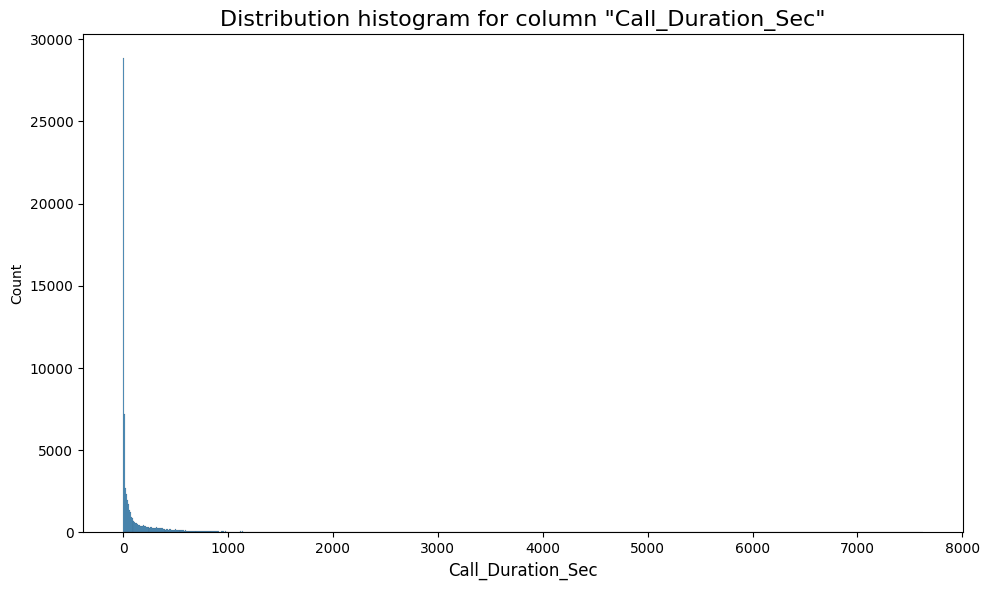

In [4]:
print('Summary statistics (average, median, mode, range) for number fields in Calls')

# the number of unique calls

unique_calls = calls['Calls_ID'].nunique()
print(f'\nTotal number of unique calls: {unique_calls}\n')

# exclude 0 sec duration because it is flag -- is call happenned

print('Summary about call duration (sec):')
calls_filtered = calls[calls['Call_Duration_Sec'] > 0]

print(calls_filtered.describe())

analyze_numeric_cols(calls_filtered, 'Call_Duration_Sec')

### Analyze categorical fields in Calls


Analysis of Calls Manager


The number of unique calls managers:

33

Distribution of calls to managers:

Calls_Manager
Yara Edwards       9059
Julia Nelson       7446
Ian Miller         7215
Charlie Davis      7213
Diana Evans        6857
Ulysses Adams      6085
Amy Green          5982
Nina Scott         5581
Victor Barnes      5439
Kevin Parker       5406
Paula Underwood    4580
Quincy Vincent     4384
Jane Smith         3753
Cara Iverson       3300
John Doe           2986
Ben Hall           2947
Alice Johnson      1251
Mason Roberts      1166
Derek James         948
George King         850
Zachary Foster      523
Eva Kent            498
Fiona Jackson       470
Sam Young           457
Rachel White        441
Xander Dean         304
Ethan Harris        280
Hannah Lee          175
Wendy Clark         162
Bob Brown            99
Oliver Taylor        10
Tina Zhang            5
Laura Quinn           2
Name: count, dtype: int64


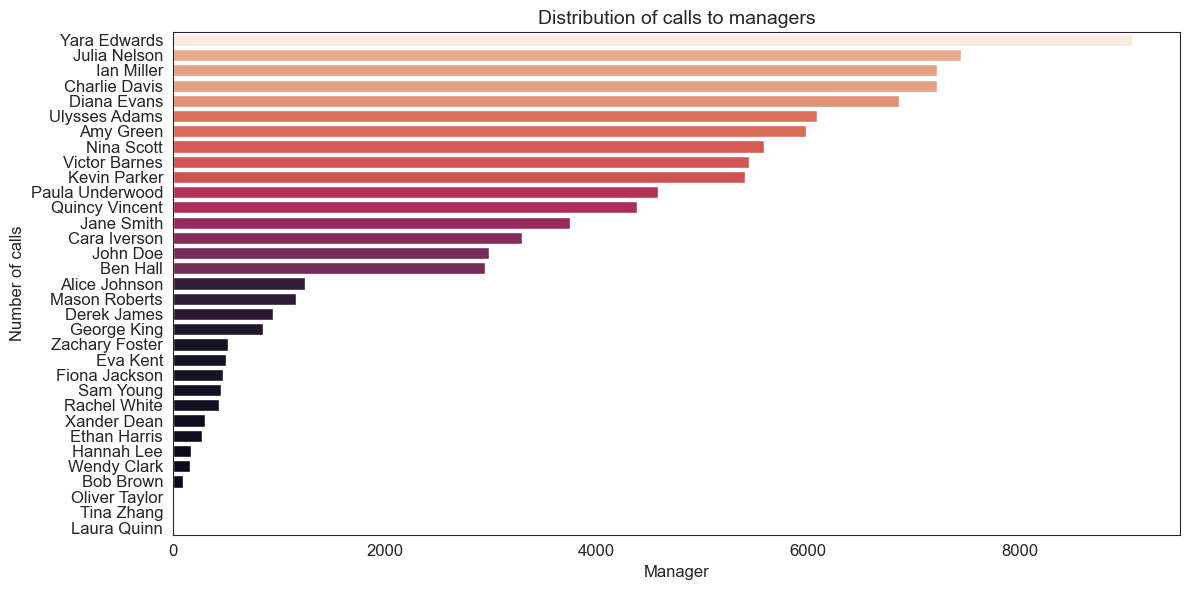


Analysis of Call Type


Distribution of type calls:

Call_Type
Outbound    86875
Missed       5921
Inbound      3078
Name: count, dtype: int64


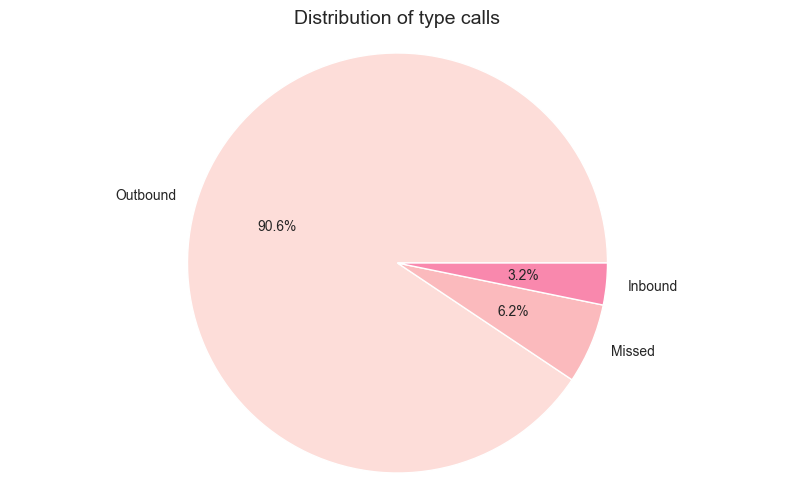


Analysis of Outgoing Call Status


Distribution of outgoing call status:

Outgoing_Call_Status
Completed    86792
Overdue         60
Cancelled       20
Scheduled        3
Name: count, dtype: int64


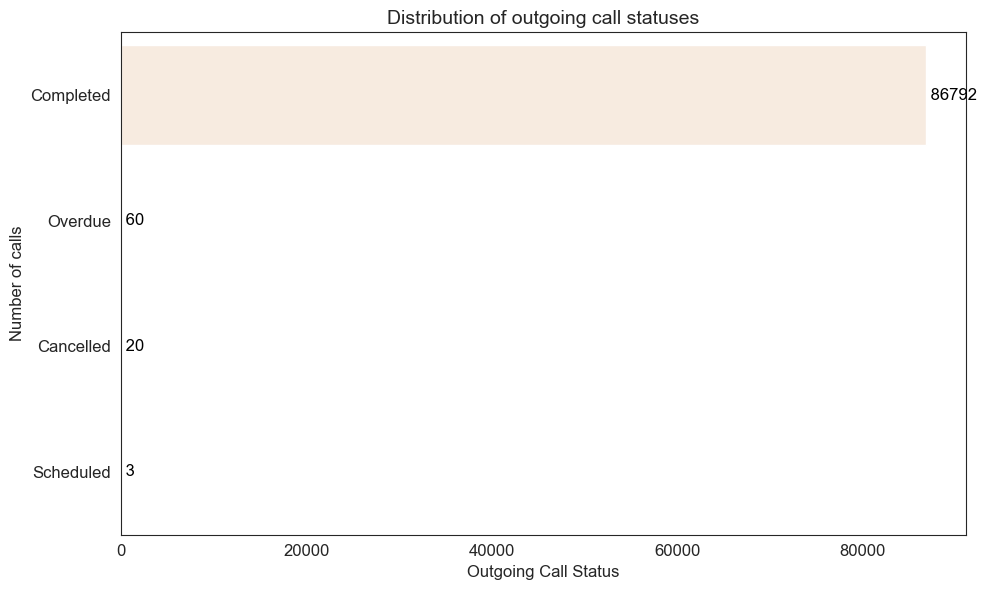

<Figure size 1000x600 with 0 Axes>

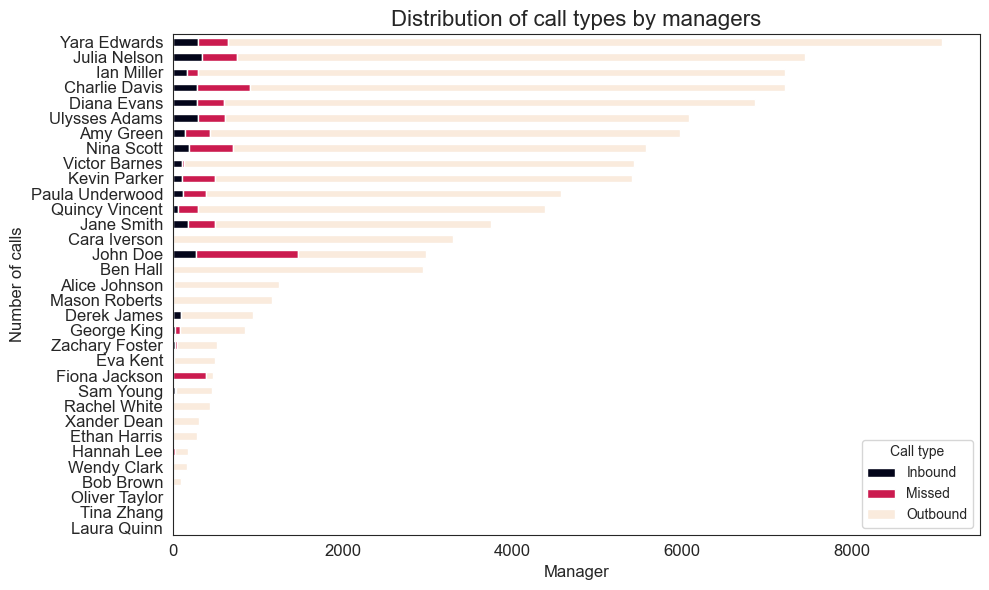

<Figure size 1000x600 with 0 Axes>

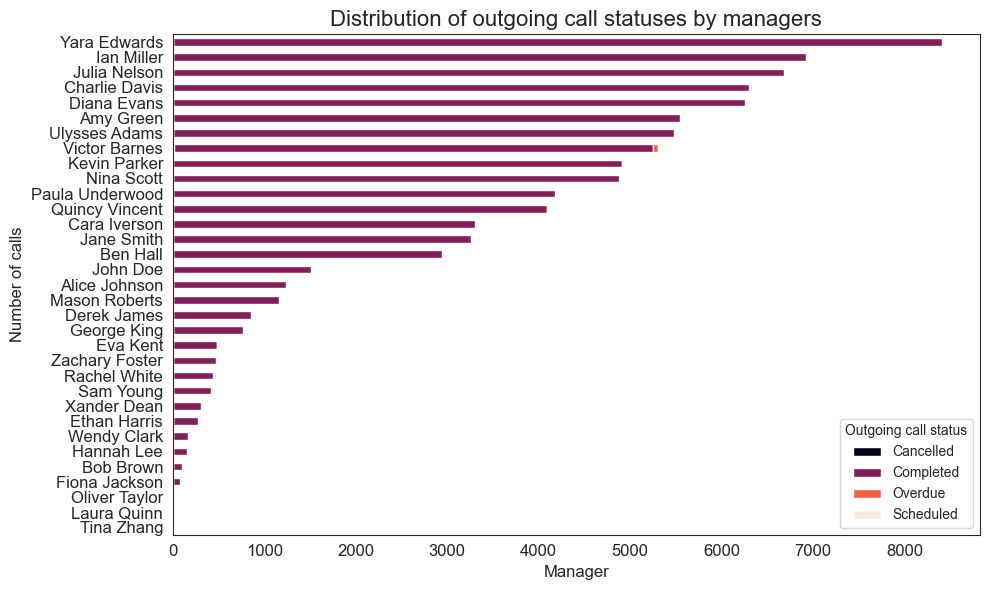

In [29]:
# Analysis of Calls_Manager

print(f'\nAnalysis of Calls Manager\n')

print(f'\nThe number of unique calls managers:\n')
calls_manager_unique = calls['Calls_Manager'].nunique()
print(calls_manager_unique)

calls_manager_counts = calls['Calls_Manager'].value_counts()
print(f'\nDistribution of calls to managers:\n')
print(calls_manager_counts)

calls_manager_counts_sorted = calls_manager_counts.sort_values(ascending=False)
sorted_managers = calls_manager_counts.sort_values(ascending=False).index
plt.figure(figsize=(12, 6))
sns.barplot(x=calls_manager_counts_sorted.values, y=calls_manager_counts_sorted.index, hue=calls_manager_counts_sorted.values, palette='rocket', order=sorted_managers, legend=False)
plt.title('Distribution of calls to managers', fontsize=14)
plt.xlabel('Manager', fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Number of calls', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('Analysis_of_Calls_Manager.png')
plt.show()

# Analysis of Call_Type

print(f'\nAnalysis of Call Type\n')

call_type_counts = calls['Call_Type'].value_counts()
print(f'\nDistribution of type calls:\n')
print(call_type_counts)

sns.set_style('white')
plt.figure(figsize=(10, 6))
plt.pie(call_type_counts, labels=call_type_counts.index, autopct='%1.1f%%', colors=sns.color_palette('RdPu'), startangle = 0)
plt.title('Distribution of type calls', fontsize=14)
plt.axis('equal')
plt.savefig('Analysis_of_Call_Type.png')
plt.show()

# Analysis of Outgoing_Call_Status
print(f'\nAnalysis of Outgoing Call Status\n')

outgoing_call_status_counts = calls['Outgoing_Call_Status'].value_counts()
print(f'\nDistribution of outgoing call status:\n')
print(outgoing_call_status_counts)

outgoing_call_status_counts_sorted = outgoing_call_status_counts.sort_values(ascending=False)
sorted_statuses = outgoing_call_status_counts.sort_values(ascending=False).index
plt.figure(figsize=(10, 6))
fig = sns.barplot(x=outgoing_call_status_counts_sorted.values, y=outgoing_call_status_counts_sorted.index, hue=outgoing_call_status_counts_sorted.values, palette='rocket', order=sorted_statuses, legend=False)
for index, value in enumerate(outgoing_call_status_counts_sorted.values):
    fig.text(value, index, f' {value}', ha='left', va='center', fontsize=12, color='black')
plt.title('Distribution of outgoing call statuses', fontsize=14)
plt.xlabel('Outgoing Call Status', fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Number of calls', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('Analysis_of_Outgoing_Call_Status.png')
plt.show()

# Analysis of Calls_Manager vs Call_Type

manager_call_type = pd.crosstab(calls['Calls_Manager'], calls['Call_Type'])
total_calls_per_manager = manager_call_type.sum(axis=1)
sorted_manager_call_type = manager_call_type.loc[total_calls_per_manager.sort_values(ascending=True).index]

plt.figure(figsize=(10, 6))
sorted_manager_call_type.plot(kind='barh', stacked=True, figsize=(10, 6), colormap='rocket')
plt.title('Distribution of call types by managers', fontsize=16)
plt.xlabel('Manager', fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Number of calls', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Call type')
plt.tight_layout()
plt.savefig('Analysis_of_Manager_Call_Type.png')
plt.show()

# Analysis of Calls_Manager vs Outgoing_Call_Status

outgoing_calls = calls[calls['Outgoing_Call_Status'].notnull()]
manager_outgoing_call_status = pd.crosstab(outgoing_calls['Calls_Manager'], outgoing_calls['Outgoing_Call_Status'])
total_outgoing_calls_per_manager = manager_outgoing_call_status.sum(axis=1)
sorted_manager_call_type = manager_outgoing_call_status.loc[total_outgoing_calls_per_manager.sort_values(ascending=True).index]

plt.figure(figsize=(10, 6))
sorted_manager_call_type.plot(kind='barh', stacked=True, figsize=(10, 6), colormap='rocket')
plt.title('Distribution of outgoing call statuses by managers', fontsize=16)
plt.xlabel('Number of calls', fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Manager', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Outgoing call status')
plt.tight_layout()
plt.savefig('Analysis_of_Outgoing_Call_Status.png')
plt.show()


## Descriptive statisctic of dataset Contacts

##### Summary:

- ###### Total number of unique contacts: 18548
- ###### Total number of unique managers: 28


In [6]:
# check format for Contacts

contacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18548 entries, 0 to 18547
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Contacts_ID       18548 non-null  object        
 1   Contacts_Manager  18548 non-null  category      
 2   Created_Time      18548 non-null  datetime64[ns]
 3   Modified_Time     18548 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](2), object(1)
memory usage: 453.2+ KB


### Calculate summary statistics (average, median, mode, range) for number fields in Contacts#

Summary statistics (average, median, mode, range) for number fields in Contacts

Total number of unique contacts: 18548


Summary about time from creation to modification in seconds:

count    1.854800e+04
mean     1.878063e+06
std      4.621008e+06
min      0.000000e+00
25%      7.200000e+03
50%      7.440000e+03
75%      5.464800e+05
max      3.028866e+07
Name: Time_To_Modify_Seconds, dtype: float64

Average: 1878063.1345697648
Median: 7440.0
Mode: 7200.0
Range (MAX - MIN): 30288660.0


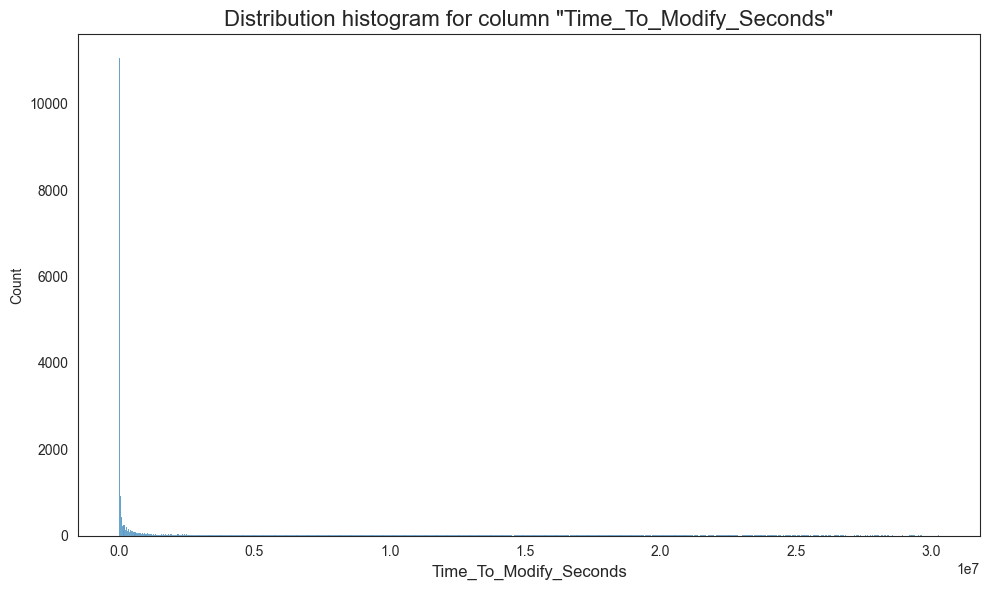

In [7]:
print('Summary statistics (average, median, mode, range) for number fields in Contacts')

# the number of unique contacts
unique_contacts = contacts['Contacts_ID'].nunique()
print(f'\nTotal number of unique contacts: {unique_contacts}\n')

# Summary statistics for time for modificatoin

contacts['Time_To_Modify'] = contacts['Modified_Time'] - contacts['Created_Time']

contacts['Time_To_Modify_Seconds'] = contacts['Time_To_Modify'].dt.total_seconds()

print(f'\nSummary about time from creation to modification in seconds:\n')
print(contacts['Time_To_Modify_Seconds'].describe())

analyze_numeric_cols(contacts, 'Time_To_Modify_Seconds')

# notning useful

### Analyze categorical fields in Contacts


Analysis of Contacts Manager


The number of unique contacts managers:

28

Distribution of contacts to managers:

Contacts_Manager
Charlie Davis      2018
Ulysses Adams      1816
Julia Nelson       1769
Paula Underwood    1487
Quincy Vincent     1416
Nina Scott         1150
Ben Hall           1038
Victor Barnes       967
Cara Iverson        880
Rachel White        782
Jane Smith          754
Bob Brown           685
Ian Miller          684
Diana Evans         678
Yara Edwards        655
Amy Green           621
Eva Kent            365
Kevin Parker        325
Mason Roberts       217
George King         144
Sam Young            37
Alice Johnson        27
Oliver Taylor        19
Zachary Foster        8
Tina Zhang            2
Wendy Clark           2
Unknown               1
Derek James           1
Name: count, dtype: int64


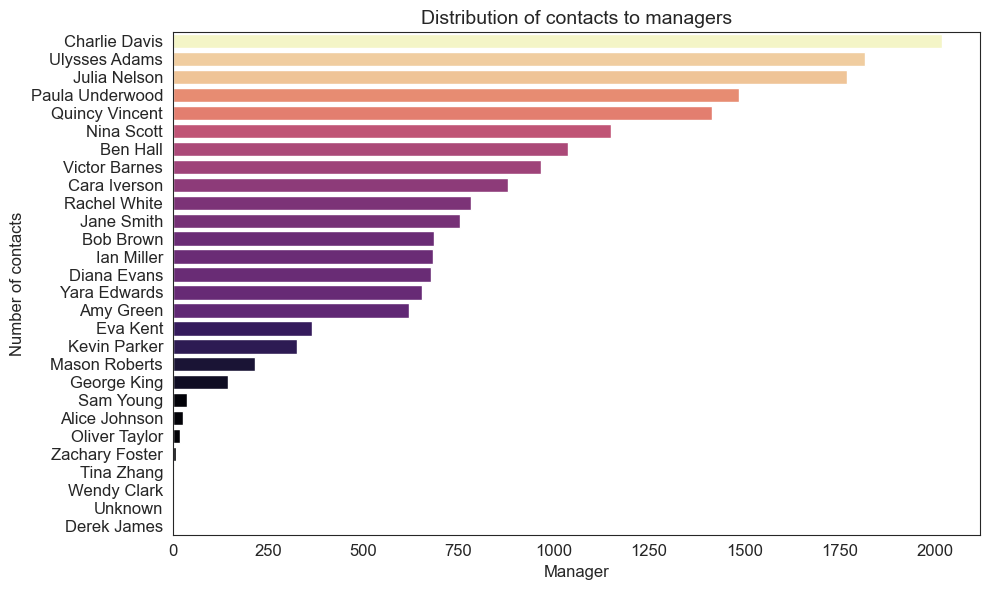

In [8]:
# Analysis of Contacts_Manager
print(f'\nAnalysis of Contacts Manager\n')

print(f'\nThe number of unique contacts managers:\n')
contacts_manager_unique = contacts['Contacts_Manager'].nunique()
print(contacts_manager_unique)

contacts_manager_counts = contacts['Contacts_Manager'].value_counts()
print(f'\nDistribution of contacts to managers:\n')
print(contacts_manager_counts)

contacts_manager_counts_sorted = contacts_manager_counts.sort_values(ascending=False)
sorted_contacts_managers = contacts_manager_counts.sort_values(ascending=False).index
plt.figure(figsize=(10, 6))
sns.barplot(x=contacts_manager_counts_sorted.values, y=contacts_manager_counts_sorted.index, hue=contacts_manager_counts_sorted.values, palette='magma', order=sorted_contacts_managers, legend=False)
plt.title('Distribution of contacts to managers', fontsize=14)
plt.xlabel('Number of contacts', fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Manager', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('Analysis_of_Contacts_Manager.png')
plt.show()

## Descriptive statisctic of dataset Deals

##### Summary:

- ###### Total number of unique managers: 28
- ###### AVG initial amount paid: 1807
- ###### MAX initial amount paid: 11500
- ###### Mode&Median initial amount paid: 1000
- ###### AVG total offer amount paid: 9034
- ###### MAX total offer amount paid: 11500
- ###### Mode&Median total offer amount paid: 11000
- ###### Course duration is 6 or 11 months
- ###### AVG SLA is Average: 5.7 hours
- ###### Over 70% deals are Lost
- ###### The most popular lost reason - NO response
- ###### The most popular sources - Google Ads & Facebook Ads (total number of unique sources: 13)
- ###### Over 70% payments are recurring payments
- ###### The most popular product - digital marketing
- ###### 98% courses with education type "morning"
- ###### The most popular level of German - b1

In [9]:
# check format for Deals

deals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19773 entries, 0 to 21592
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype          
---  ------                     --------------  -----          
 0   Deals_ID                   19773 non-null  object         
 1   Deals_Manager              19773 non-null  category       
 2   Closing_Date               13105 non-null  datetime64[ns] 
 3   Quality                    19773 non-null  category       
 4   Stage                      19773 non-null  category       
 5   Lost_Reason                14368 non-null  category       
 6   Page                       19773 non-null  category       
 7   Deals_Campaign             19773 non-null  category       
 8   SLA                        19773 non-null  timedelta64[ns]
 9   Content                    19773 non-null  object         
 10  Term                       19773 non-null  object         
 11  Source                     19773 non-null  category       


### Calculate summary statistics (average, median, mode, range) for number fields in Deals

summary statistics (average, median, mode, range) for number fields in Deals

Total number of unique deals: 8293


Summary about deals:

                        Closing_Date                        SLA  \
count                          13105                      19773   
mean   2024-01-28 16:09:09.408622592  0 days 05:43:17.535325949   
min              2022-10-11 00:00:00            0 days 00:00:03   
25%              2023-11-11 00:00:00            0 days 00:15:53   
50%              2024-02-08 00:00:00            0 days 01:57:27   
75%              2024-04-19 00:00:00            0 days 11:24:36   
max              2024-12-11 00:00:00            0 days 23:59:42   
std                              NaN  0 days 06:54:31.178027391   

                        Created_Time  Course_Duration  Initial_Amount_Paid  \
count                          19773     19773.000000         19773.000000   
mean   2024-01-28 12:48:22.509482496         1.810297           317.453143   
min              2023-07-

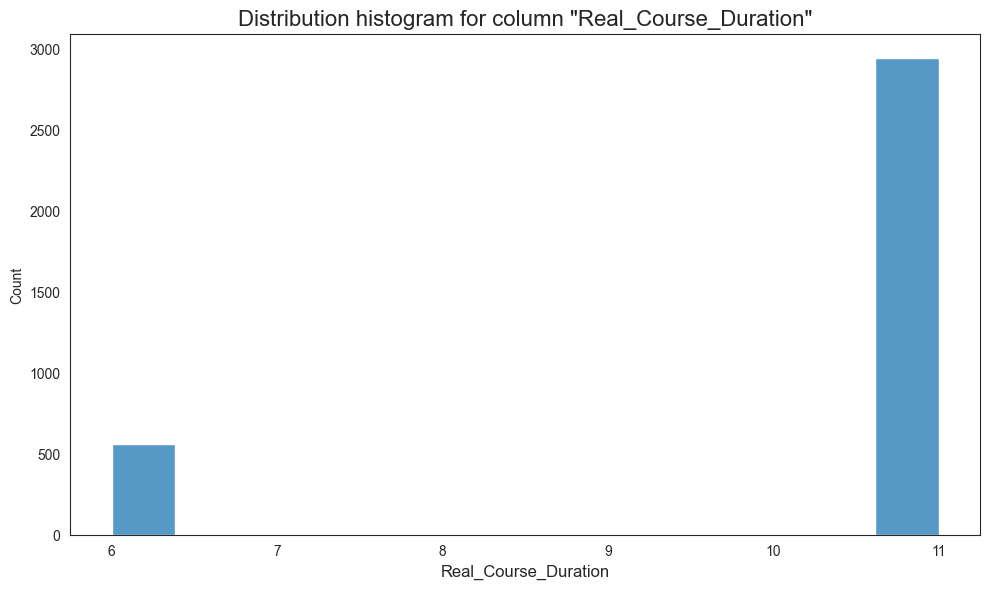


Summary about initial amount paid (euros):


Average: 1806.8511801957397
Median: 1000.0
Mode: 1000.0
Range (MAX - MIN): 11499.0


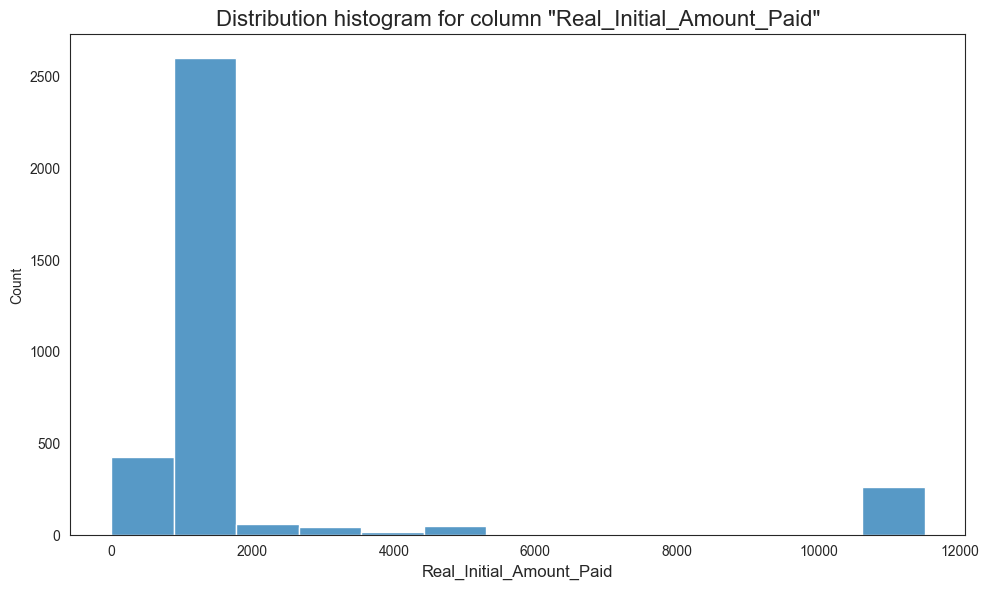


Summary about offer total amount (euros):


Average: 9034.066590779737
Median: 11000.0
Mode: 11000.0
Range (MAX - MIN): 11499.0


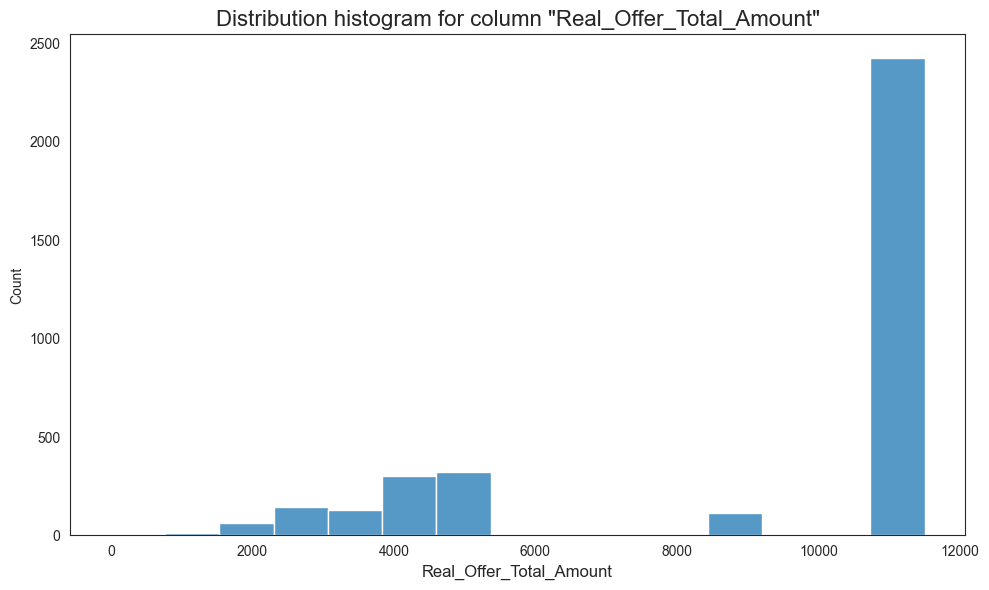


Summary about time between creation and closing in seconds:


Average: 1640380.018672393
Median: 469080.0
Mode: 8040.0
Range (MAX - MIN): 28886160.0


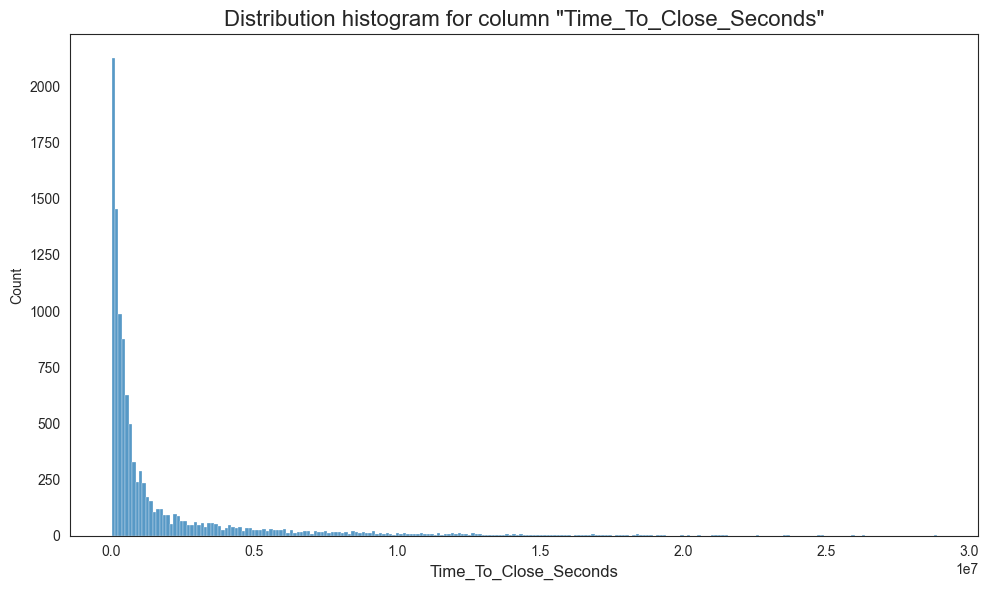


Summary about SLA in seconds:


Average: 20597.535325949528
Median: 7047.0
Mode: 740.0
Range (MAX - MIN): 86379.0


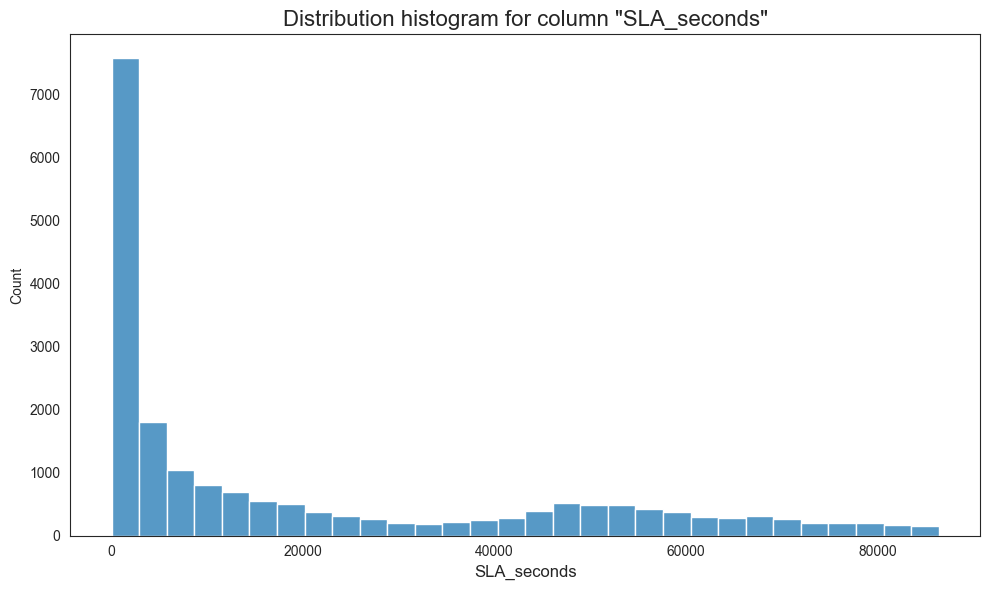

In [10]:
print('summary statistics (average, median, mode, range) for number fields in Deals')

# the number of unique deals
unique_deals = deals['Deals_ID'].nunique()
print(f'\nTotal number of unique deals: {unique_deals}\n')
print(f'\nSummary about deals:\n')
print(deals.describe())

# Summary statistics for course duration

print(f'\nSummary about course duration (months):\n')

deals['Real_Course_Duration'] = deals['Course_Duration'][deals['Course_Duration'] != 0]
analyze_numeric_cols(deals, 'Real_Course_Duration')

# Summary statistics for initial amount paid
# exclude 1000000 because it is flag -- no payment

print(f'\nSummary about initial amount paid (euros):\n')

deals['Real_Initial_Amount_Paid'] = deals['Initial_Amount_Paid'][(deals['Initial_Amount_Paid']< 1000000) & (deals['Initial_Amount_Paid'] > 0)]
analyze_numeric_cols(deals, 'Real_Initial_Amount_Paid')

# Summary statistics for offer total amount
# exclude 1000000 because it is flag -- no offer

print(f'\nSummary about offer total amount (euros):\n')

deals['Real_Offer_Total_Amount'] = deals['Offer_Total_Amount'][(deals['Offer_Total_Amount'] < 1000000) & (deals['Offer_Total_Amount'] > 0)]
analyze_numeric_cols(deals, 'Real_Offer_Total_Amount')

# Summary statistics for time between creation and closing

deals_valid = deals[deals['Closing_Date'].notnull() & (deals['Closing_Date'] >= deals['Created_Time'])].copy()

deals_valid['Time_To_Close'] = deals_valid['Closing_Date'] - deals_valid['Created_Time']

deals_valid['Time_To_Close_Seconds'] = deals_valid['Time_To_Close'].dt.total_seconds()

print(f'\nSummary about time between creation and closing in seconds:\n')

analyze_numeric_cols(deals_valid, 'Time_To_Close_Seconds')

# Summary statistics for SLA

print(f'\nSummary about SLA in seconds:\n')

deals['SLA_seconds'] = deals['SLA'].dt.total_seconds()

analyze_numeric_cols(deals, 'SLA_seconds')

### Analyze categorical fields in Deals


Analysis of Deals Manager


The number of unique deals managers:

28

Distribution of deals to managers:

Deals_Manager
Charlie Davis      2791
Julia Nelson       2085
Ulysses Adams      2068
Quincy Vincent     1800
Paula Underwood    1771
Ben Hall           1303
Nina Scott         1217
Victor Barnes      1182
Cara Iverson       1033
Diana Evans         926
Jane Smith          901
Kevin Parker        490
Eva Kent            452
Ian Miller          441
Rachel White        339
Mason Roberts       258
Bob Brown           230
Oliver Taylor       155
George King          84
Yara Edwards         73
Sam Young            57
Amy Green            49
Unknown              28
Alice Johnson        25
John Doe             10
Xander Dean           3
Wendy Clark           1
Zachary Foster        1
Name: count, dtype: int64


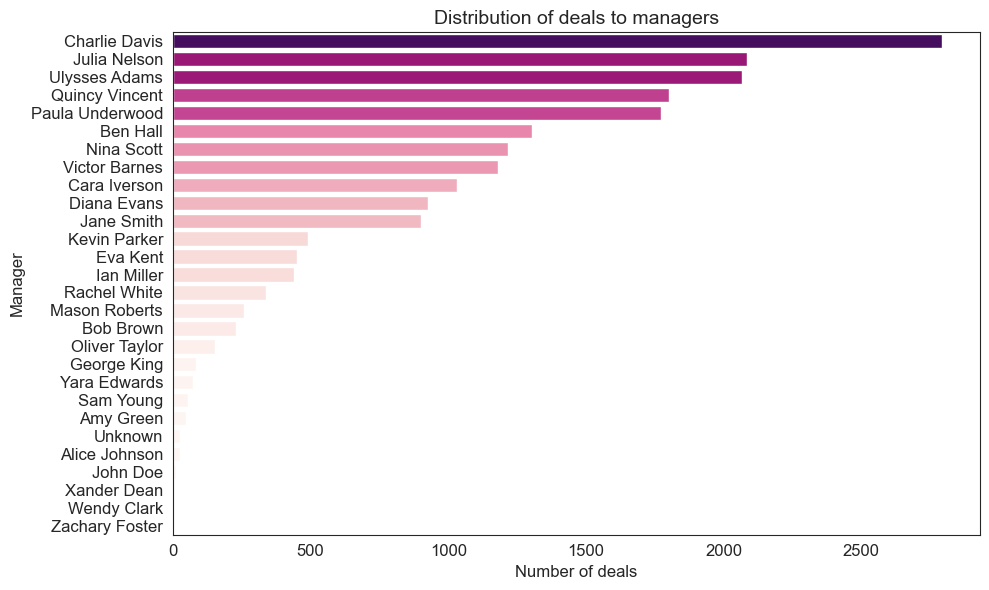


Analysis of Quality


Distribution of known qualities:

Quality
E - Non Qualified    6133
D - Non Target       6071
C - Low              3387
B - Medium           1532
A - High              416
Name: count, dtype: int64


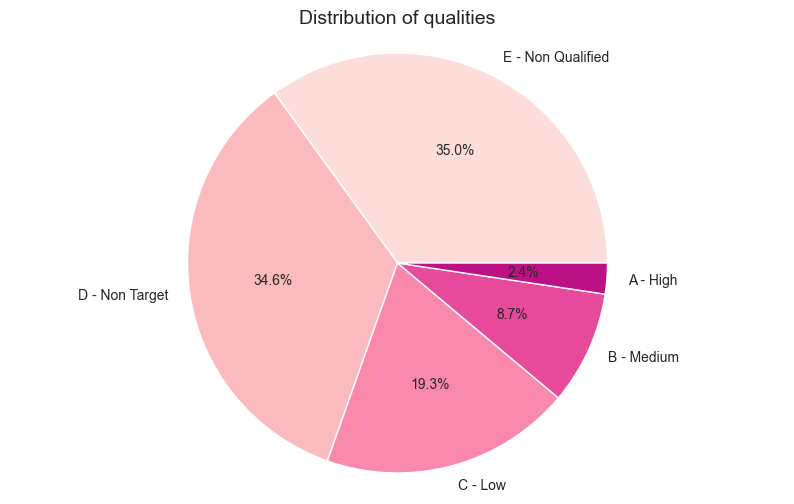


Analysis of Stage


Distribution of stages:

Stage_Combined
Lost                   13967
In Progress             4600
Payment Done             846
Waiting For Payment      324
New Lead                   5
Name: count, dtype: int64


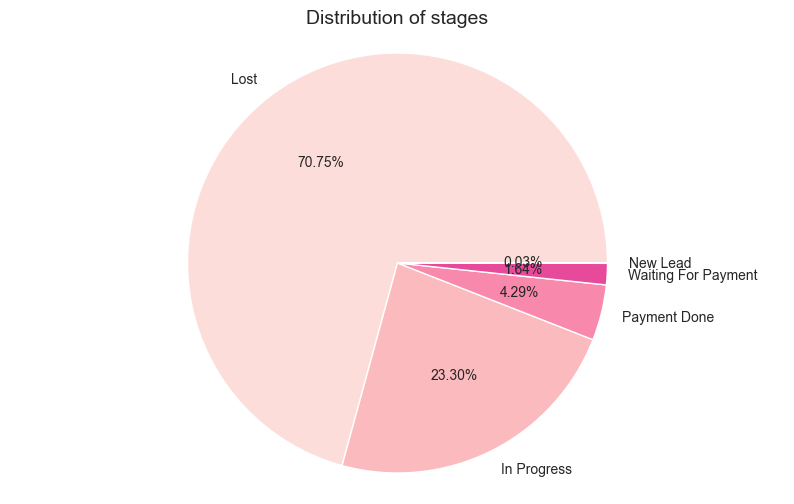


Analysis of Lost Reason


The number of unique lost reasons:

7

Distribution of lost reasons:

Lost_Reason_Combined
No Response          5714
Refusal              2465
Other                2094
Technical Issues     1479
Personal Issues      1328
Financial Reasons     925
Skill Issues          363
Name: count, dtype: int64


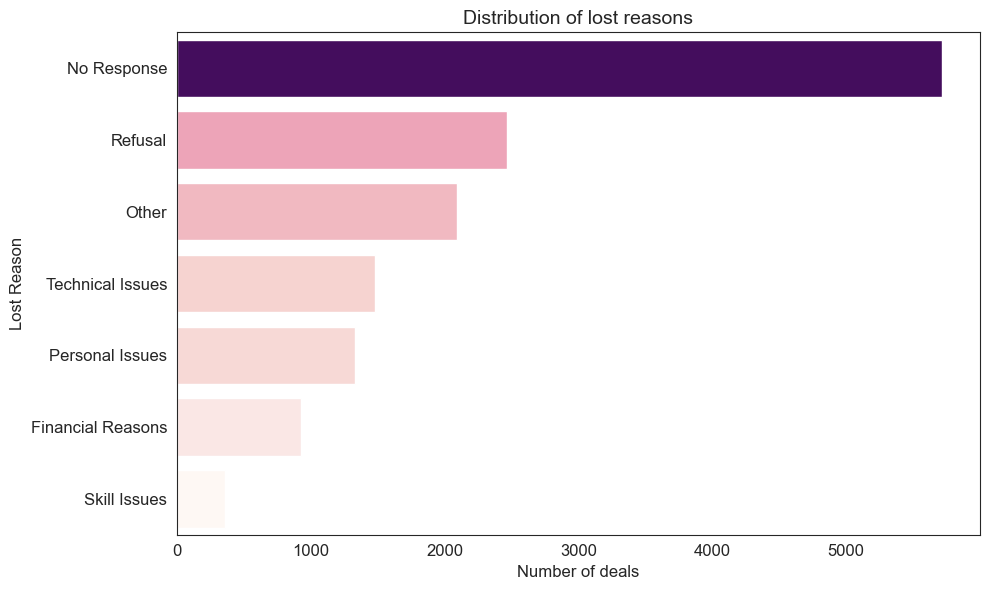


Analysis of Deals Source


The number of unique deals sources:

13

Distribution of deals to managers:

Source
Facebook Ads      4728
Google Ads        4113
Tiktok Ads        2003
SMM               1668
Youtube Ads       1618
Organic           1469
CRM               1455
Bloggers          1073
Telegram posts     992
Webinar            305
Partnership        191
Test               156
Offline              2
Name: count, dtype: int64


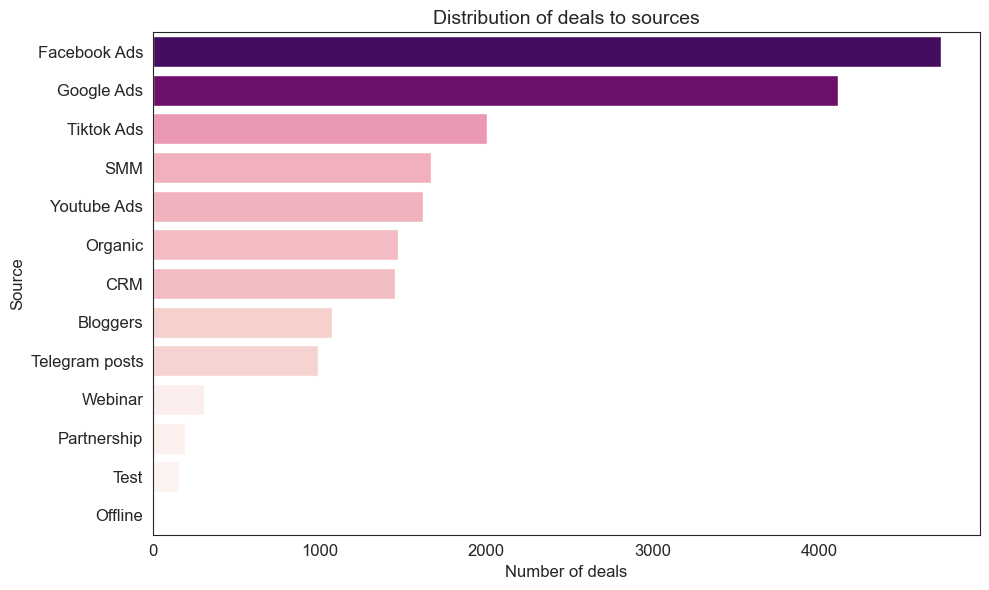


Analysis of Payment Type


Distribution of known payment types:

Payment_Type
Recurring Payments    338
One Payment           135
Reservation             5
Name: count, dtype: int64


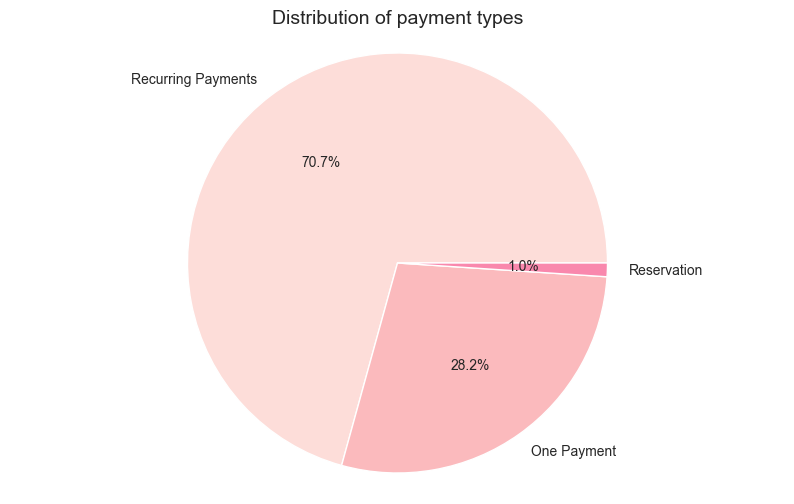


Analysis of Product


Distribution of known products:

Product
Digital Marketing      1942
UX/UI Design           1005
Web Developer           563
Find yourself in IT       3
Data Analytics            1
Name: count, dtype: int64


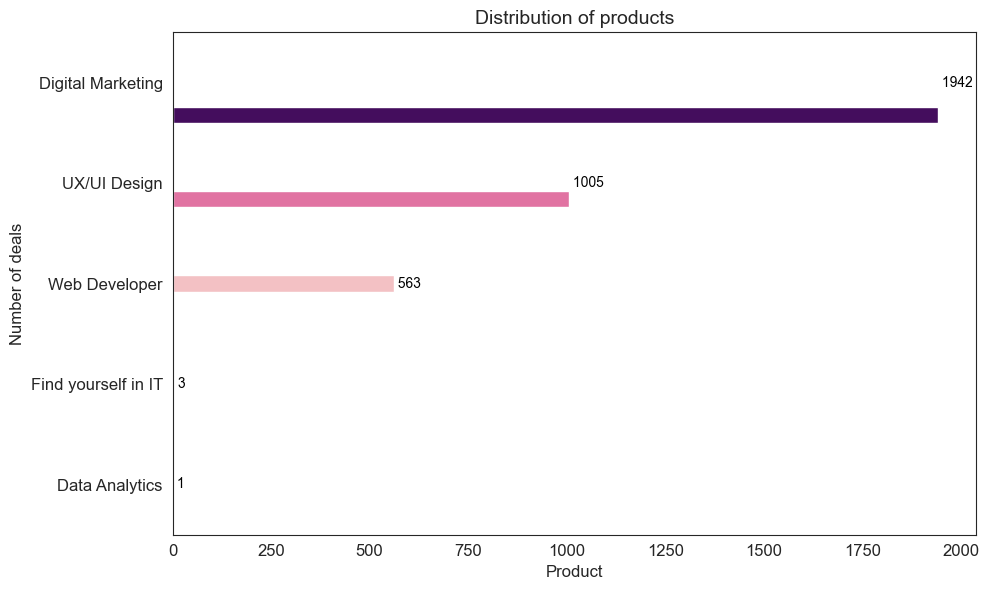


Analysis of Education Type


Distribution of known education types:

Education_Type
Morning    19373
Evening      396
Name: count, dtype: int64


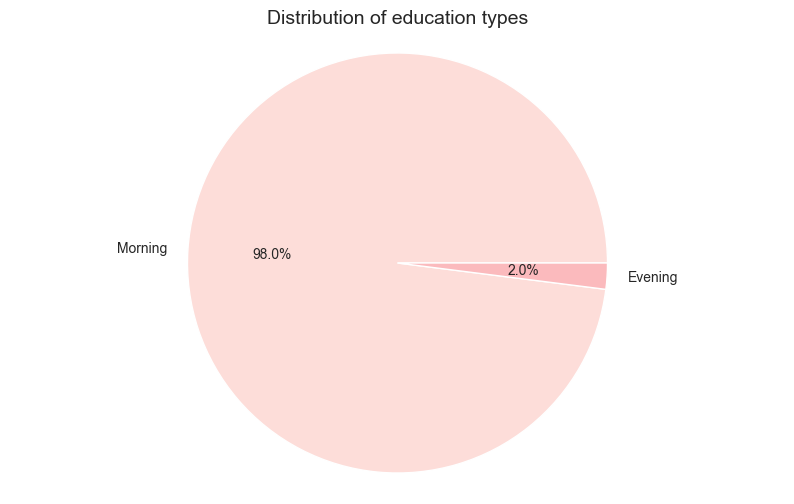


Analysis of Level Of German


Distribution of known levels of german:

Level_Of_German
b1       773
b2       163
a2       134
b1-b2     33
c1        26
a1        22
a2-b1     13
a1-a2      4
b2-c1      4
c2         3
Name: count, dtype: int64


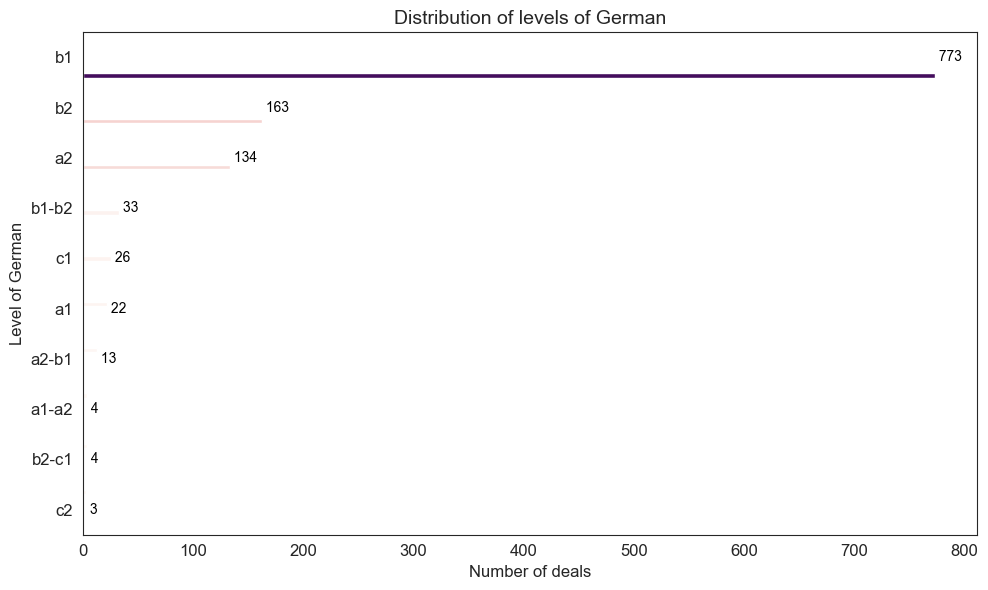

<Figure size 1000x600 with 0 Axes>

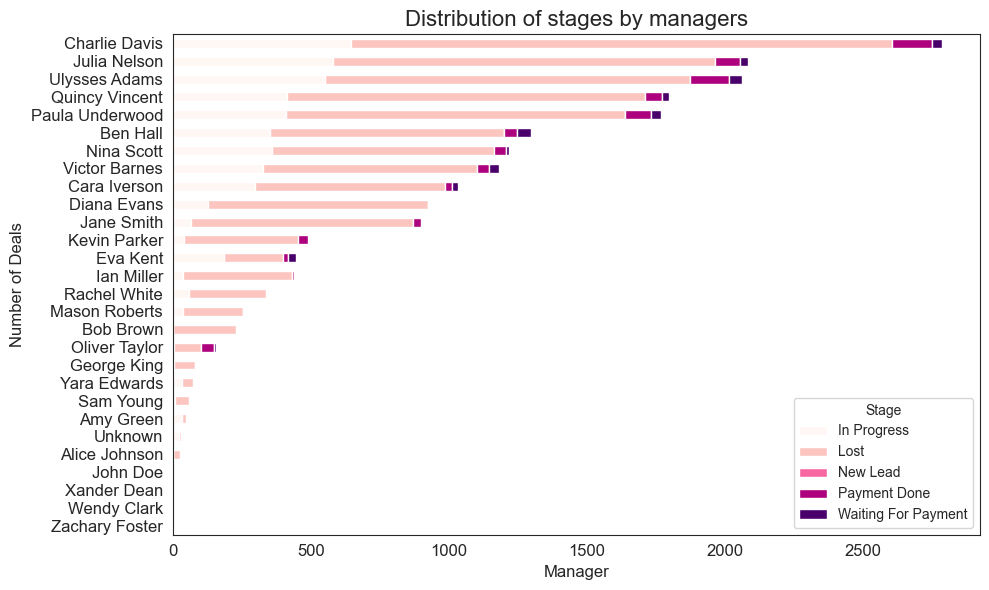

<Figure size 1000x600 with 0 Axes>

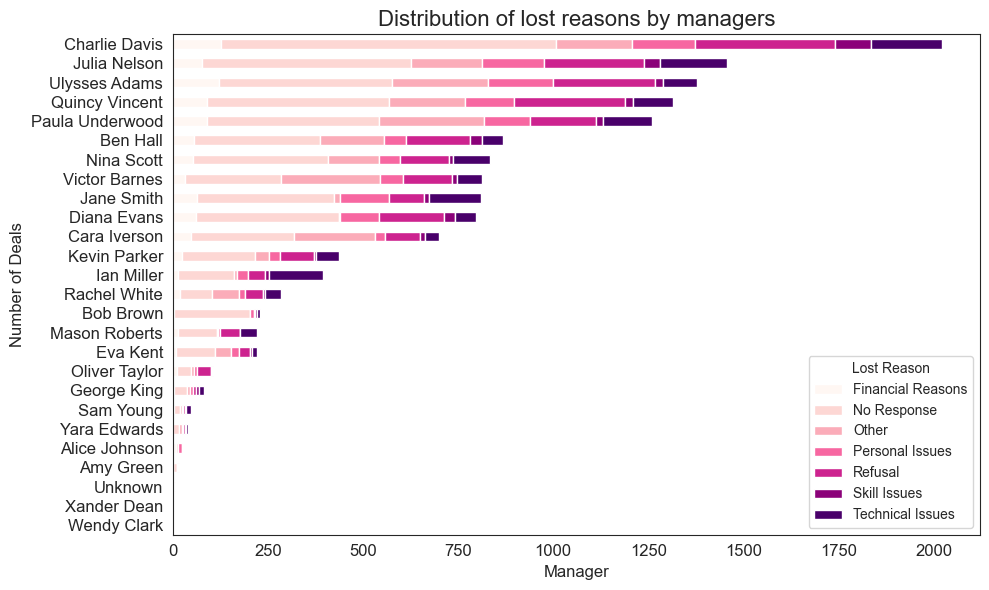

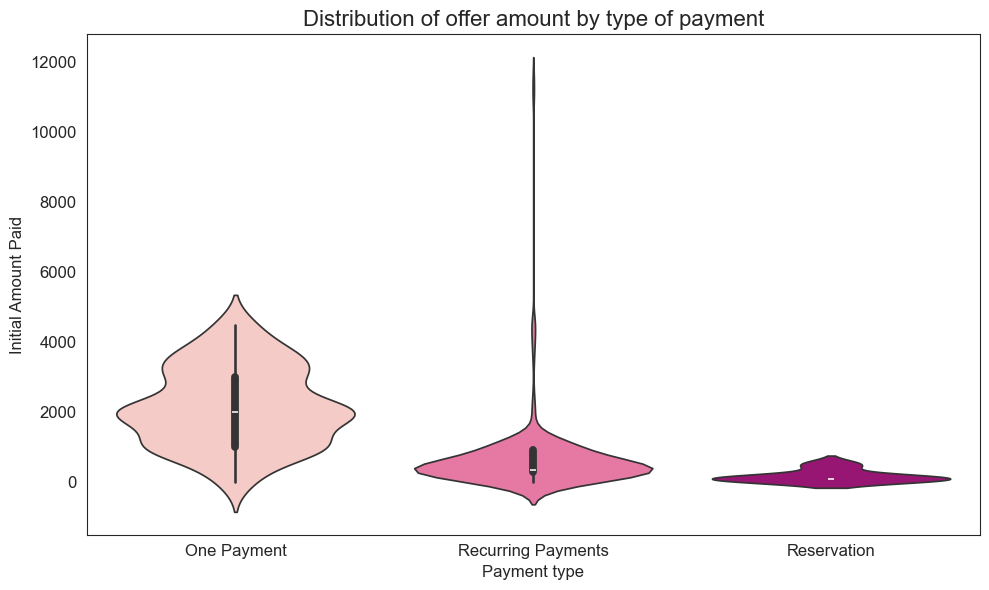

<Figure size 300x200 with 0 Axes>

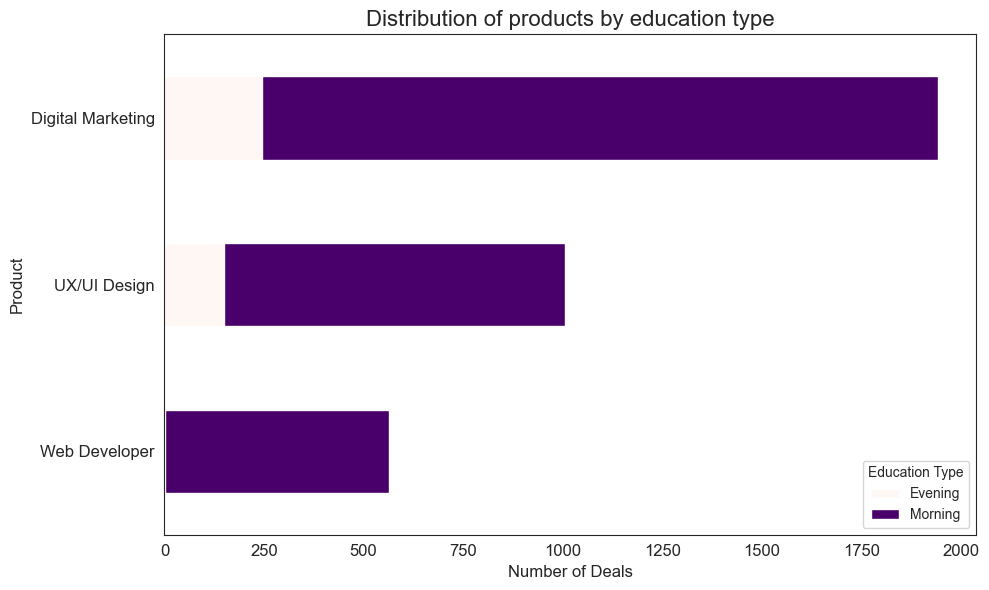

In [32]:
# Analysis of Deals_Manager
print(f'\nAnalysis of Deals Manager\n')

print(f'\nThe number of unique deals managers:\n')
deals_manager_unique = deals['Deals_Manager'].nunique()
print(deals_manager_unique)

deals_manager_counts = deals['Deals_Manager'].value_counts()
print(f'\nDistribution of deals to managers:\n')
print(deals_manager_counts)

deals_manager_counts_sorted = deals_manager_counts.sort_values(ascending=False)
sorted_deals_managers = deals_manager_counts.sort_values(ascending=False).index
plt.figure(figsize=(10, 6))
sns.barplot(x=deals_manager_counts_sorted.values, y=deals_manager_counts_sorted.index, hue=deals_manager_counts_sorted.values, palette='RdPu', order=sorted_deals_managers, legend=False)
plt.title('Distribution of deals to managers', fontsize=14)
plt.xlabel('Number of deals', fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Manager', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('Analysis_of_Deals_Manager.png')
plt.show()

# Analysis of Quality

print(f'\nAnalysis of Quality\n')

deals_known_quality_counts = deals[deals['Quality']!='F - Unknown']['Quality'].value_counts()
deals_known_quality_counts = deals_known_quality_counts[deals_known_quality_counts > 0]
print(f'\nDistribution of known qualities:\n')
print(deals_known_quality_counts)

sns.set_style('white')
plt.figure(figsize=(10, 6))
plt.pie(deals_known_quality_counts, labels=deals_known_quality_counts.index, autopct='%1.1f%%', colors=sns.color_palette('RdPu'), startangle = 0)
plt.title('Distribution of qualities', fontsize=14)
plt.axis('equal')
plt.savefig('Analysis_of_Quality.png')
plt.show()

# Analysis of Stage (on combined version)

print(f'\nAnalysis of Stage\n')

deals_stage_counts = deals['Stage_Combined'].value_counts()
print(f'\nDistribution of stages:\n')
print(deals_stage_counts)

sns.set_style('white')
plt.figure(figsize=(10, 6))
plt.pie(deals_stage_counts, labels=deals_stage_counts.index, autopct='%1.2f%%', colors=sns.color_palette('RdPu'), startangle = 0)
plt.title('Distribution of stages', fontsize=14)
plt.axis('equal')
plt.savefig('Analysis_of_Stage.png')
plt.show()

# Analysis of Lost_Reason (on combined version)

print(f'\nAnalysis of Lost Reason\n')

print(f'\nThe number of unique lost reasons:\n')
deals_lost_reasons_unique = deals['Lost_Reason_Combined'].nunique()
print(deals_lost_reasons_unique)

deals_lost_reasons_counts = deals['Lost_Reason_Combined'].value_counts()
print(f'\nDistribution of lost reasons:\n')
print(deals_lost_reasons_counts)

deals_lost_reasons_counts_sorted = deals_lost_reasons_counts.sort_values(ascending=False)
sorted_lost_reasons = deals_lost_reasons_counts.sort_values(ascending=False).index
plt.figure(figsize=(10, 6))
sns.barplot(x=deals_lost_reasons_counts_sorted.values, y=deals_lost_reasons_counts_sorted.index, hue=deals_lost_reasons_counts_sorted.values, palette='RdPu', order=sorted_lost_reasons, legend=False)
plt.title('Distribution of lost reasons', fontsize=14)
plt.xlabel('Number of deals', fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Lost Reason', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('Analysis_of_Lost_Reason.png')
plt.show()

# Analysis of Deals_Source
print(f'\nAnalysis of Deals Source\n')

print(f'\nThe number of unique deals sources:\n')
deals_source_unique = deals['Source'].nunique()
print(deals_source_unique)

deals_source_counts = deals['Source'].value_counts()
print(f'\nDistribution of deals to managers:\n')
print(deals_source_counts)

deals_source_counts_sorted = deals_source_counts.sort_values(ascending=False)
sorted_deals_sources = deals_source_counts.sort_values(ascending=False).index
plt.figure(figsize=(10, 6))
sns.barplot(x=deals_source_counts_sorted.values, y=deals_source_counts_sorted.index, hue=deals_source_counts_sorted.values, palette='RdPu', order=sorted_deals_sources, legend=False)
plt.title('Distribution of deals to sources', fontsize=14)
plt.xlabel('Number of deals', fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Source', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('Analysis_of_Deals_Source.png')
plt.show()

# Analysis of Payment_Type

print(f'\nAnalysis of Payment Type\n')

deals_known_payment_type_counts = deals[deals['Payment_Type']!='Unknown']['Payment_Type'].value_counts()
deals_known_payment_type_counts = deals_known_payment_type_counts[deals_known_payment_type_counts > 0]
print(f'\nDistribution of known payment types:\n')
print(deals_known_payment_type_counts)

sns.set_style('white')
plt.figure(figsize=(10, 6))
plt.pie(deals_known_payment_type_counts, labels=deals_known_payment_type_counts.index, autopct='%1.1f%%', colors=sns.color_palette('RdPu'), startangle = 0)
plt.title('Distribution of payment types', fontsize=14)
plt.axis('equal')
plt.savefig('Analysis_of_Payment_Type.png')
plt.show()

# Analysis of Product

print(f'\nAnalysis of Product\n')

deals_known_product_counts = deals[deals['Product']!='Unknown']['Product'].value_counts()
deals_known_product_counts = deals_known_product_counts[deals_known_product_counts > 0]
print(f'\nDistribution of known products:\n')
print(deals_known_product_counts)

deals_products_counts_sorted = deals_known_product_counts.sort_values(ascending=False)
sorted_deals_products = deals_known_product_counts.sort_values(ascending=False).index
plt.figure(figsize=(10, 6))
fig_products=sns.barplot(x=deals_products_counts_sorted.values, y=deals_products_counts_sorted.index, hue=deals_products_counts_sorted.values, palette='RdPu', order=sorted_deals_products, legend=False)
for index, value in enumerate(deals_products_counts_sorted.values):
    fig_products.text(value, index, f' {value}', ha='left', va='center', fontsize=10, color='black')
plt.title('Distribution of products', fontsize=14)
plt.xlabel('Product', fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Number of deals', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('Analysis_of_Product.png')
plt.show()

# Analysis of Education_Type

print(f'\nAnalysis of Education Type\n')

deals_known_education_type_counts = deals[deals['Education_Type']!='Unknown']['Education_Type'].value_counts()
deals_known_education_type_counts = deals_known_education_type_counts[deals_known_education_type_counts > 0]
print(f'\nDistribution of known education types:\n')
print(deals_known_education_type_counts)

sns.set_style('white')
plt.figure(figsize=(10, 6))
plt.pie(deals_known_education_type_counts, labels=deals_known_education_type_counts.index, autopct='%1.1f%%', colors=sns.color_palette('RdPu'), startangle = 0)
plt.title('Distribution of education types', fontsize=14)
plt.axis('equal')
plt.savefig('Analysis_of_Education_Type.png')
plt.show()

# Analysis of Level_Of_German

print(f'\nAnalysis of Level Of German\n')

deals_known_level_of_german_counts = deals[deals['Level_Of_German']!='Unknown']['Level_Of_German'].value_counts()
deals_known_level_of_german_counts = deals_known_level_of_german_counts[deals_known_level_of_german_counts > 0]

print(f'\nDistribution of known levels of german:\n')
print(deals_known_level_of_german_counts)

deals_levels_counts_sorted = deals_known_level_of_german_counts.sort_values(ascending=False)
sorted_deals_levels_counts = deals_known_level_of_german_counts.sort_values(ascending=False).index

plt.figure(figsize=(10, 6))
fig_levels = sns.barplot(x=deals_levels_counts_sorted.values, y = deals_levels_counts_sorted.index, hue = deals_levels_counts_sorted.values, palette='RdPu', order=sorted_deals_levels_counts, legend=False)
for index, value in enumerate(deals_levels_counts_sorted.values):
    fig_levels.text(value, index, f' {value}', ha='left', va='center', fontsize=10, color='black')
plt.title('Distribution of levels of German', fontsize=14)
plt.xlabel('Number of deals', fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Level of German', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('Analysis_of_Level_Of_German.png')
plt.show()

# Analysis of Deals_Manager vs Stage

manager_stage = pd.crosstab(deals['Deals_Manager'], deals['Stage_Combined'])
total_deals_per_manager = manager_stage.sum(axis=1)
sorted_manager_stage = manager_stage.loc[total_deals_per_manager.sort_values(ascending=True).index]

plt.figure(figsize=(10, 6))
sorted_manager_stage.plot(kind='barh', stacked=True, figsize=(10, 6), colormap='RdPu')
plt.title('Distribution of stages by managers', fontsize=16)
plt.xlabel('Manager', fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Number of Deals', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Stage')
plt.tight_layout()
plt.savefig('Analysis_of_Manager_Stage.png')
plt.show()

# Analysis of Deals_Manager vs Lost_reason

manager_lost_reason = pd.crosstab(deals['Deals_Manager'], deals['Lost_Reason_Combined'])
total_deals_per_manager_lost_reason = manager_lost_reason.sum(axis=1)
sorted_manager_lost_reason = manager_lost_reason.loc[total_deals_per_manager_lost_reason.sort_values(ascending=True).index]

plt.figure(figsize=(10, 6))
sorted_manager_lost_reason.plot(kind='barh', stacked=True, figsize=(10, 6), colormap='RdPu')
plt.title('Distribution of lost reasons by managers', fontsize=16)
plt.xlabel('Manager', fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Number of Deals', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Lost Reason')
plt.tight_layout()
plt.savefig('Analysis_of_Manager_Lost_Reason.png')
plt.show()

# Analysis of Payment Type vs Initial

deals_filtered_payment = deals[deals['Payment_Type'] != 'Unknown'].copy()
deals_filtered_payment['Payment_Type'] = deals_filtered_payment['Payment_Type'].cat.remove_unused_categories()


plt.figure(figsize=(10, 6))
sns.violinplot(x='Payment_Type', y='Initial_Amount_Paid', data=deals_filtered_payment, palette='RdPu', hue='Payment_Type', legend=False )
plt.title('Distribution of offer amount by type of payment', fontsize=16)
plt.xlabel('Payment type', fontsize=12)
plt.ylabel('Initial Amount Paid', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('Analysis_of_Payment_Type_Initial_Paid.png')
plt.show()

# Analysis of Product vs Education Type

deals_filtered_pet = deals[(deals['Product'] != 'Unknown') & (deals['Education_Type'] != 'Unknown')].copy()
deals_filtered_pet['Education_Type'] = deals_filtered_pet['Education_Type'].cat.remove_unused_categories()

education_type_product = pd.crosstab(deals_filtered_pet['Product'], deals_filtered_pet['Education_Type'])
total_deals_per_product = education_type_product.sum(axis=1)
sorted_type_product = education_type_product.loc[total_deals_per_product.sort_values(ascending=True).index]

plt.figure(figsize=(3, 2))
sorted_type_product.plot(kind='barh', stacked=True, figsize=(10, 6), colormap='RdPu')
plt.title('Distribution of products by education type', fontsize=16)
plt.xlabel('Number of Deals', fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Product', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Education Type')
plt.tight_layout()
plt.savefig('Analysis_of_Product_Education_Type.png')
plt.show()

## Descriptive statisctic of dataset Spend

##### Summary:

- ###### Total spend: 149523.45
- ###### Total number of unique sources: 14
- ###### The biggest spends amount for Google Ads & Facebook Ads

In [12]:
# check format for Spend

spend.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19862 entries, 0 to 20778
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    19862 non-null  datetime64[ns]
 1   Spend_Source            19862 non-null  category      
 2   Spend_Campaign          19862 non-null  category      
 3   Impressions             19862 non-null  int64         
 4   Spend                   19862 non-null  float64       
 5   Clicks                  19862 non-null  int64         
 6   Ad_Group                19862 non-null  object        
 7   Ad                      19862 non-null  object        
 8   Is_Campaign_Unknown     19862 non-null  bool          
 9   Is_Spend_For_No_Clicks  19862 non-null  bool          
dtypes: bool(2), category(2), datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 1.1+ MB


### Calculate summary statistics (average, median, mode, range) for number fields in Spend

Summary statistics (average, median, mode, range) for number fields in Spend

Total spend: 149523.45


Summary about spend:                                 Date    Impressions         Spend  \
count                          19862   19862.000000  19862.000000   
mean   2024-01-10 18:21:55.879568896    2571.695197      7.528117   
min              2023-07-03 00:00:00       0.000000      0.000000   
25%              2023-10-09 00:00:00       1.000000      0.000000   
50%              2024-01-20 00:00:00      82.000000      0.740000   
75%              2024-04-12 00:00:00     760.750000      6.160000   
max              2024-06-21 00:00:00  431445.000000    774.000000   
std                              NaN   11691.227016     27.325150   

             Clicks  
count  19862.000000  
mean      25.095912  
min        0.000000  
25%        0.000000  
50%        2.000000  
75%       13.000000  
max     2415.000000  
std       87.032314  


Summary about course impressions:


Average: 2571.6951

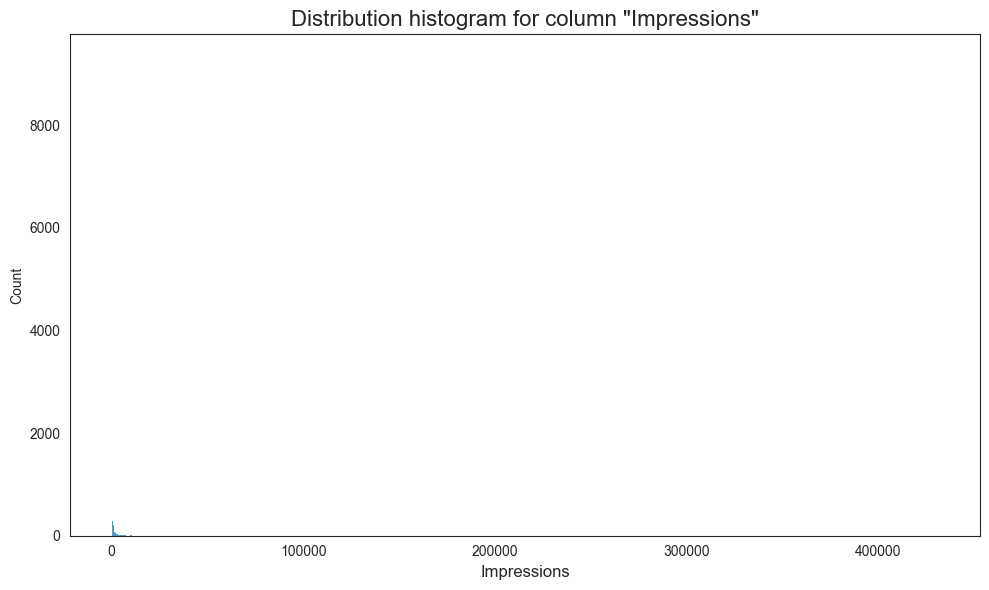


Summary about clicks:


Average: 25.095911791360386
Median: 2.0
Mode: 0
Range (MAX - MIN): 2415


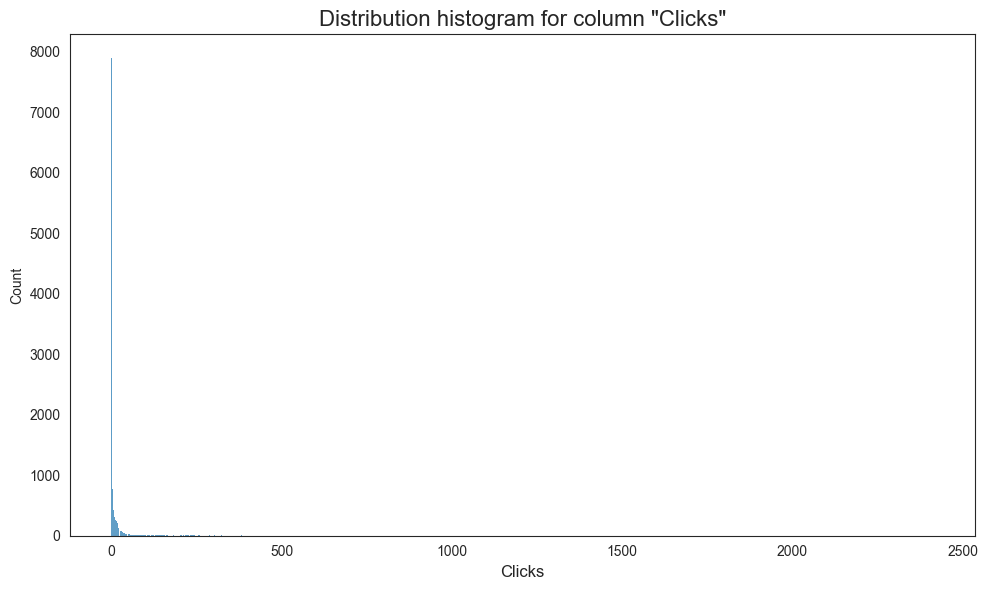


Summary about spend:


Average: 7.52811650387675
Median: 0.74
Mode: 0.0
Range (MAX - MIN): 774.0


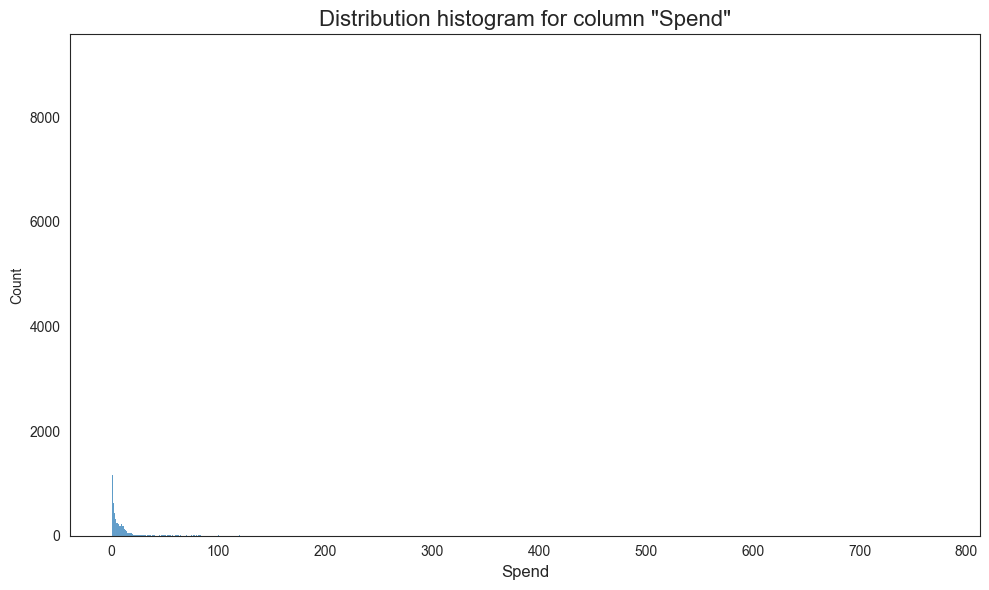

In [13]:
print('Summary statistics (average, median, mode, range) for number fields in Spend')

print(f'\nTotal spend: {spend['Spend'].sum()}\n')

print(f'\nSummary about spend: {spend.describe()}\n')

# Summary statistics for  impressions

print(f'\nSummary about course impressions:\n')

analyze_numeric_cols(spend, 'Impressions')

# Summary statistics for  clicks

print(f'\nSummary about clicks:\n')

analyze_numeric_cols(spend, 'Clicks')

# Summary statistics for spend

print(f'\nSummary about spend:\n')

analyze_numeric_cols(spend, 'Spend')

### Analyze categorical fields in Spend


Analysis of Source


The number of unique sources:

14


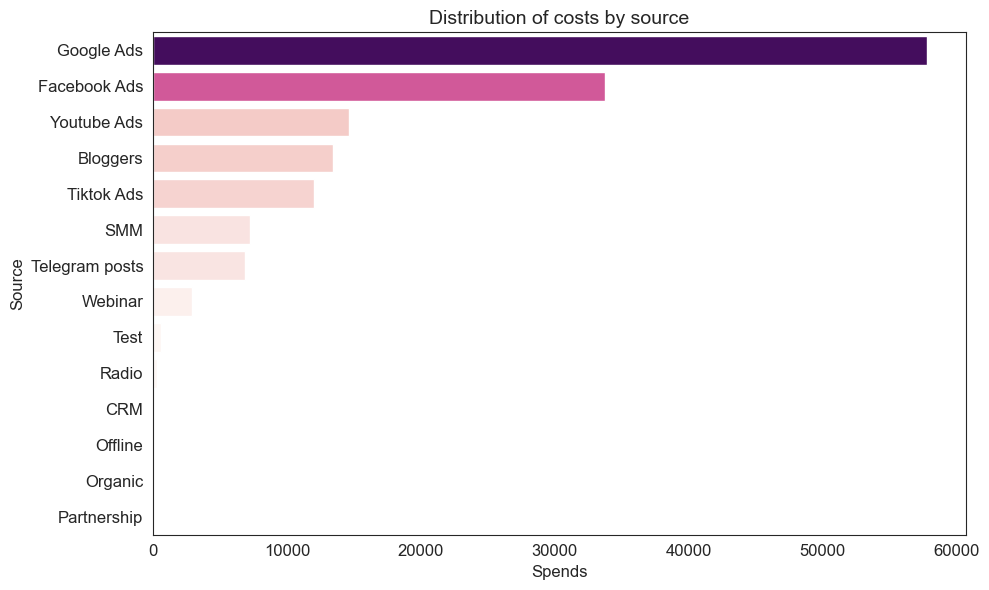

In [14]:
# Analysis of Source
print(f'\nAnalysis of Source\n')

print(f'\nThe number of unique sources:\n')
spend_known_source_unique = spend[spend['Spend_Source']!='Unknown']['Spend_Source'].nunique()
print(spend_known_source_unique)

# Analysis Spend by Source

spend_by_source = spend.groupby('Spend_Source', observed=True)['Spend'].sum().sort_values(ascending=False)

spend_by_source_sorted = spend_by_source.sort_values(ascending=False)
sorted_spends = spend_by_source.sort_values(ascending=False).index
plt.figure(figsize=(10, 6))
sns.barplot(x=spend_by_source_sorted.values, y=spend_by_source_sorted.index, hue=spend_by_source_sorted.values, palette='RdPu', order=sorted_spends, legend=False)
plt.title('Distribution of costs by source', fontsize=14)
plt.xlabel('Spends', fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Source', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('Analysis_of_Source_Spend.png')
plt.show()